In [1]:
import sys

import matplotlib.pyplot as plt

# from thom import *
from thom.maps import *

%load_ext autoreload
%autoreload 2

(-1.0, 1.0)

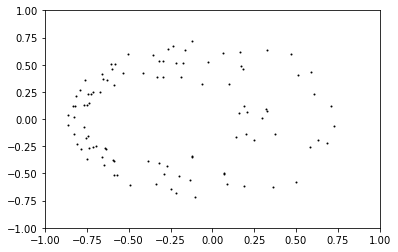

In [5]:
model = BlinkingVortex()


sol = model.make_trajectory(100)

# plt.plot(sol[:, 0], sol[:, 1], '.k')

xx, yy = sol[0, :, 0]*np.cos(sol[0, :, 1]), sol[0, :, 0]*np.sin(sol[0, :, 1])

# plt.plot(xx, yy, '.k', markersize=0.1)
plt.plot(xx, yy, '.k', markersize=2)

plt.xlim([-1, 1])
plt.ylim([-1, 1])
# plt.plot(xx[0], yy[0], '.r')

In [3]:
model.ic = np.random.random((20, 2)) - 0.5
sol_fwd = model.make_trajectory(30)

In [103]:
ic_xy = 2/(np.sqrt(2))*(np.random.random((20, 2)) - 0.5)

In [402]:
im.shape

(937, 1800, 4)

In [432]:
im = plt.imread("/Users/williamgilpin/Desktop/misc/longhorn.png")[ ::-1, :, 3]
yy, xx = np.where(im > 0.0)

In [465]:
im = np.rot90(plt.imread("/Users/williamgilpin/Desktop/misc/lab3.png")[:, ::-1, 0], 2)
yy, xx = np.where(im < 1.0)

In [471]:
im = plt.imread("/Users/williamgilpin/Desktop/misc/longhorn3.png")[ ::-1, :, 3]
yy, xx = np.where(im > 0.0)

In [518]:
im = np.rot90(plt.imread("/Users/williamgilpin/Desktop/misc/lab4.png")[:, ::-1, 0], 2)
yy, xx = np.where(im < 1.0)

In [521]:
len(xx)

147992

In [578]:
im = np.rot90(plt.imread("/Users/williamgilpin/Desktop/misc/lab4.png")[:, ::-1, 0], 2)
yy, xx = np.where(im < 0.1)


# im = plt.imread("/Users/williamgilpin/Desktop/misc/longhorn3.png")[ ::-1, :, 3]
# yy, xx = np.where(im > 0.0)

xx = xx - np.mean(xx)
yy = yy - np.mean(yy)
yy /= 3*np.std(xx)
xx /= 3*np.std(xx)

xx += np.random.random(xx.shape)*1e-3
yy += np.random.random(yy.shape)*1e-3

ic_xy = np.vstack([xx, yy]).T
ic0 = np.vstack([np.linalg.norm(ic_xy, axis=1), np.arctan2(ic_xy[:, 1], ic_xy[:, 0])]).T

model = BlinkingVortex()
model.ic = np.copy(ic0)
sol_fwd = model.make_trajectory(10)



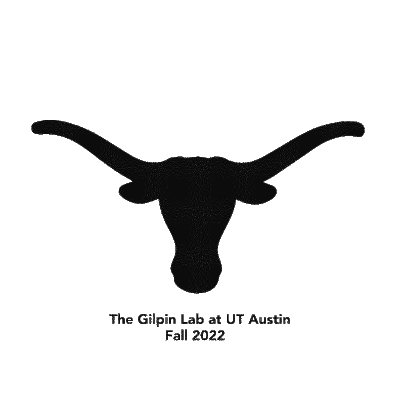

In [577]:

plt.figure(figsize=(7, 7))
plt.plot(xx, yy,'.k', markersize=1.2, markeredgecolor='none')

plt.xlim([-1, 1])
plt.ylim([-1, 1])

fixed_aspect_ratio(1)
# plt.gca().set_aspect("equal")
plt.gca().set_axis_off()

In [580]:

## high res flow

curr = np.copy(ic0)
all_sol = [curr]

pts_per_period = 20
num_periods = 9

b0 = -0.5

for i in range(pts_per_period * num_periods):
    print(i)
    if i % pts_per_period == 0:
        b0 = -b0
    model = BlinkingVortex()
    model.b = b0
    model.t /= pts_per_period
    model.ic = np.copy(curr)
    curr = np.squeeze(model.make_trajectory(1)[:, -1, :])
    
    all_sol.append(np.copy(curr))
    
all_sol = np.array(all_sol)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179


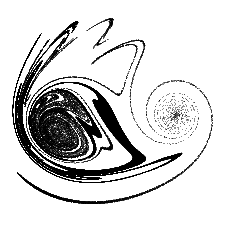

In [581]:
# all_sol


plt.figure()



tind = -1
plt.plot(all_sol[tind, :, 0]*np.cos(all_sol[tind, :, 1]), all_sol[tind, :, 0]*np.sin(all_sol[tind, :, 1]), '.k', 
         markersize=1.5, markeredgecolor='none')

plt.xlim([-0.9, 0.9])
plt.ylim([-0.9, 0.9])



# plt.style.use('dark_background')


fixed_aspect_ratio(1)
plt.gca().set_axis_off()

# plt.savefig("mix" + str(tind) + ".png", dpi=600)

In [583]:
# all_sol

for tind in range(len(all_sol)):
    plt.figure()
    plt.plot(all_sol[tind, :, 0]*np.cos(all_sol[tind, :, 1]), all_sol[tind, :, 0]*np.sin(all_sol[tind, :, 1]), '.k', 
             markersize=1.0, markeredgecolor='none')

    plt.xlim([-0.9, 0.9])
    plt.ylim([-0.9, 0.9])

    fixed_aspect_ratio(1)
    plt.gca().set_axis_off()

    plt.savefig("archive/dump/mix_" + str(len(all_sol) - tind).zfill(4) + ".png", dpi=300)
    plt.close()
    


In [584]:
for qq in range(1, 30):
    
    tind = 0
    plt.figure()
    plt.plot(all_sol[tind, :, 0]*np.cos(all_sol[tind, :, 1]), all_sol[tind, :, 0]*np.sin(all_sol[tind, :, 1]), '.k', 
             markersize=1.0, markeredgecolor='none')

    plt.xlim([-0.9, 0.9])
    plt.ylim([-0.9, 0.9])

    fixed_aspect_ratio(1)
    plt.gca().set_axis_off()

    plt.savefig("archive/dump/mix_" + str(len(all_sol) + qq).zfill(4) + ".png", dpi=300)
    plt.close()

In [299]:
def fixed_aspect_ratio(ratio, ax=None, 
	log=False, semilogy=False, semilogx=False):
    '''
    Set a fixed aspect ratio on matplotlib plots 
    regardless of axis units
    '''
    if not ax:
        ax = plt.gca()
    xvals, yvals = ax.axes.get_xlim(), ax.axes.get_ylim()
    xrange = xvals[1] - xvals[0]
    yrange = yvals[1] - yvals[0]
    if log:
        xrange = np.log10(xvals[1]) - np.log10(xvals[0])
        yrange = np.log10(yvals[1]) - np.log10(yvals[0])
    if semilogy:
        yrange = np.log10(yvals[1]) - np.log10(yvals[0])
    if semilogx:
        xrange = np.log10(xvals[1]) - np.log10(xvals[0])
    try:
        ax.set_aspect(ratio*(xrange/yrange), adjustable='box')
    except NotImplementedError:
        warnings.warn("Setting aspect ratio is experimental for 3D plots.")
        plt.gca().set_box_aspect((1, 1, ratio*(xrange/yrange)))
        #ax.set_box_aspect((ratio*(xrange/yrange), 1, 1))

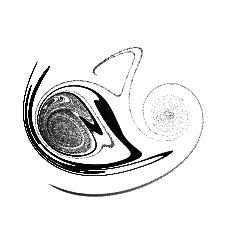

In [482]:
# from degas import fixed_aspect_ratio

tind = 9
plt.plot(sol_fwd[:, tind, 0]*np.cos(sol_fwd[:, tind, 1]), sol_fwd[:, tind, 0]*np.sin(sol_fwd[:, tind, 1]), '.k', markersize=0.9, markeredgecolor='none')

plt.xlim([-1, 1])
plt.ylim([-1, 1])

fixed_aspect_ratio(1)
# plt.gca().set_aspect("equal")
plt.gca().set_axis_off()

In [498]:
from degas import fixed_aspect_ratio

fixed_aspect_ratio(1)

ImportError: cannot import name 'fixed_aspect_ratio' from 'degas' (unknown location)

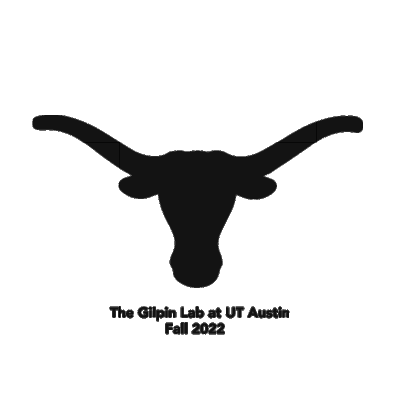

In [542]:
# from degas import fixed_aspect_ratio


plt.figure(figsize=(7, 7))
tind = 0
plt.plot(sol_fwd[:, tind, 0]*np.cos(sol_fwd[:, tind, 1]), sol_fwd[:, tind, 0]*np.sin(sol_fwd[:, tind, 1]),
         'sk', markersize=0.5, markeredgecolor='none')

plt.xlim([-1, 1])
plt.ylim([-1, 1])

fixed_aspect_ratio(1)
# plt.gca().set_aspect("equal")
plt.gca().set_axis_off()

In [142]:
all_err = list()


ic_xy = 2/(np.sqrt(2))*(np.random.random((100, 2)) - 0.5)

ic0 = np.vstack([np.linalg.norm(ic_xy, axis=1), np.arctan2(ic_xy[:, 1], ic_xy[:, 0])]).T

for i in range(2, 200):
    model = BlinkingVortex()
    model.ic = np.copy(ic0)
    sol_fwd = model.make_trajectory(i)

    model.ic = sol_fwd[:, -1, :]

    sol_rev = model.make_trajectory(i, inverse=True)[:, ::-1, :]

    all_err.append(np.median(np.mean((sol_fwd[:, 0, :] - sol_rev[:, 0, :])**2, axis=-1)))

KeyboardInterrupt: 

In [121]:
ic_xy = 2/(np.sqrt(2))*(np.random.random((100, 2)) - 0.5)
ic0 = np.vstack([np.linalg.norm(ic_xy, axis=1), np.arctan2(ic_xy[:, 1], ic_xy[:, 0])]).T

(-1.0, 1.0)

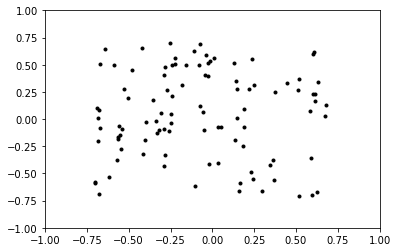

In [122]:

plt.plot(ic0[:, 0]*np.cos(ic0[:, 1]), ic0[:, 0]*np.sin(ic0[:, 1]), '.k' )

plt.xlim([-1, 1])
plt.ylim([-1, 1])

In [348]:
def pol2cart(arr, axis=0):
    if len(np.squeeze(arr).shape) > 1:
        coord_ind = np.where(np.array(arr.shape) == 2)[0][0]
#     print(coord_ind)
    return np.transpose(np.dstack([arr[0]*np.cos(arr[1]), arr[0]*np.sin(arr[1])]), (2, 0, 1))

pol2cart(sol_fwd)

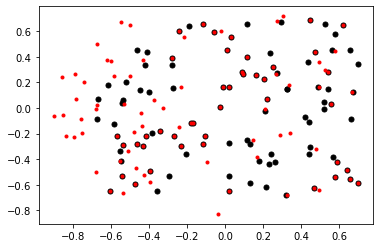

In [130]:
plt.figure()
plt.plot(sol_fwd[:, 0, 0].T*np.cos(sol_fwd[:, 0, 1].T), sol_fwd[:, 0, 0].T*np.sin(sol_fwd[:, 0, 1].T), '.k', markersize=10)
plt.plot(sol_rev[:, 0, 0].T*np.cos(sol_rev[:, 0, 1].T), sol_rev[:, 0, 0].T*np.sin(sol_rev[:, 0, 1].T), '.r')


plt.figure()
plt.semilogy(all_err)

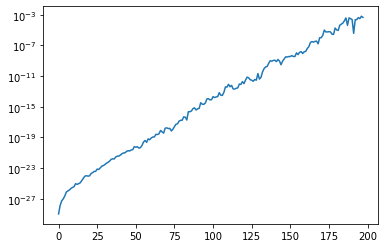

In [5]:
model.ic

array([[ 0.32886226, -0.4196598 ],
       [-0.49525956,  0.20267798],
       [-0.39887682, -0.05912257],
       [ 0.16501387, -0.41700047],
       [ 0.43479007,  0.00692262],
       [ 0.01171145,  0.00501438],
       [ 0.00308377, -0.0963061 ],
       [-0.42316006,  0.49297455],
       [-0.30513311,  0.49271804],
       [ 0.44779273, -0.21406013],
       [ 0.37205927, -0.08869652],
       [-0.05913464, -0.02340027],
       [-0.23176977,  0.33920737],
       [-0.3774191 ,  0.36000044],
       [ 0.09005465,  0.05349303],
       [-0.25177957, -0.45915346],
       [-0.2917359 ,  0.03200953],
       [ 0.380869  ,  0.32505277],
       [-0.05230329, -0.15273836],
       [ 0.09215073,  0.34964717]])

In [6]:
np.isscalar(np.squeeze(np.array(5)))

False

In [7]:
len(np.asarray(4).shape)

0

In [3]:
print(model.rhs_inv(model.rhs(np.array(model.ic))))
print(model.ic)

[[0.03 0.36]]
[0.03, 0.36]


In [4]:
%timeit model.make_trajectory(1000)

66.5 ms ± 1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
%timeit model.make_trajectory(1000)

97.7 ms ± 3.11 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [3]:
%timeit model.make_trajectory(1000)

230 ms ± 4.84 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [3]:
model = Baker()
sol = model.make_trajectory(1000)

vals = sol[600:700]
vals1 = [model.rhs(item) for item in vals]
vals2 = [model.rhs_inv(item) for item in vals1]


plt.plot(np.array(vals2)[:, 0], np.array(vals2)[:, 0], '-')
plt.plot(np.array(vals2)[:, 0], vals[:, 0], '.')


IndexError: too many indices for array

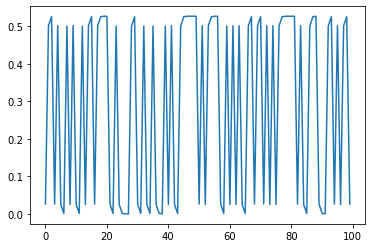

In [18]:
plt.plot(vals[:, 1])

In [7]:
pp = [2, 9]

def ff(a, b):
    return a*b

ff(*pp)

18

4.5e-05
4.5e-05
0.500045
0.500045


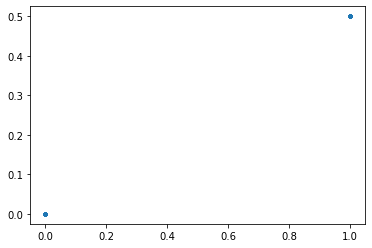

In [61]:
xx = np.linspace(0, 1, 1000)

xflr = (1.9999999999999 * xx) // 1

yp = 0.0001
a = 0.9
yy = (a * yp + xflr) / 2

print(yy[0])
print(yp * a / 2)

print(yy[-1])
print(0.5 + yp * a / 2)
plt.plot(xflr, yy, '.')

In [1]:
import sys

import matplotlib.pyplot as plt

# from thom import *
from thom.maps import *

%load_ext autoreload
%autoreload 2

[0.4 0.9]
0.4 0.6 

0.4 0.19999999999999996


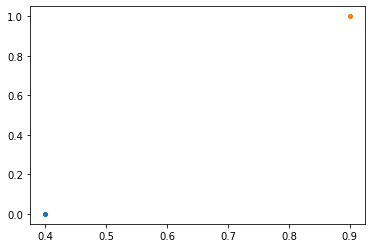

In [37]:
xx = np.linspace(0, 1, 1000)

eps2 = 2.0 - 1e-10
x_flr = (eps2 * xx) // 1

a = 1.0
y = 0.8

yp = (a * y + x_flr) / 2

print(np.unique(yp))
print(y/2, 1 - y/2, '\n')

if y < 0.5:
    print(y/2, 1 - y/2)
else:
    print(y/2, 1 - y/2 - 0.4)
    
plt.plot(yp[yp < 0.5], x_flr[yp < 0.5], '.')

plt.plot(yp[yp > 0.5], x_flr[yp > 0.5], '.')


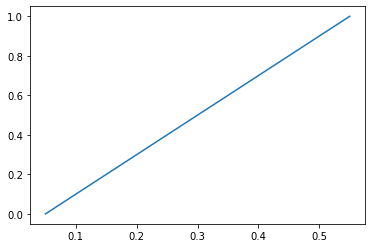

In [21]:
plt.plot(yp, x_flr)

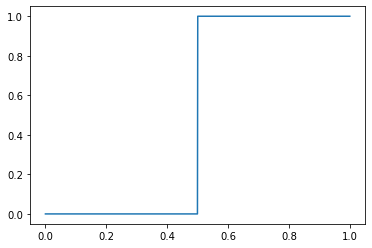

In [13]:
yp > 0.5

In [33]:
model = BlinkingVortex()
model.rhs_inv(model.rhs(np.array([0.01, 0.1])))

TypeError: len() of unsized object

In [7]:
model = Baker()

sol = model.make_trajectory(10000)

plt.plot(sol[0, :, 0], sol[0, :, 1], '.k')

No metadata available for Baker
No metadata available for Baker


AttributeError: 'NoneType' object has no attribute 'update'

In [6]:
model = Chirikov()
model.get_param_names()

['k']

In [7]:
model = Circle()
model.k = 5.7

sol = model.make_trajectory(5000)[:, -1000:, :]

plt.plot(np.sin(sol[0, :-2, 0]), 
         np.sin(sol[0, 2:, 0]), '-k')

TypeError: too many arguments: expected 3, got 4

In [5]:
qq = np.random.random((50, 3))

qq2 = np.vstack([qq, [0, 3, 4]])
print(qq2.shape)

(51, 3)


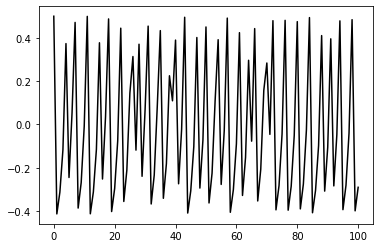

In [20]:
model = Gauss()
model.b = -0.5
model.a *= 2

sol = model.make_trajectory(100)

plt.plot(sol[0, :], 'k')

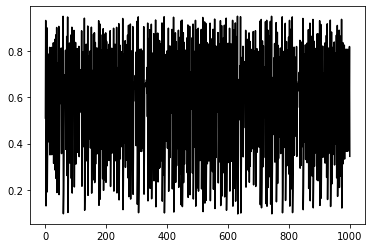

In [12]:
model = Tent()

sol = model.make_trajectory(1000)

plt.plot(sol[0, :], 'k')

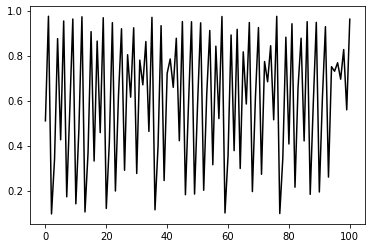

In [6]:
sol = Logistic().make_trajectory(100)

plt.plot(sol[0, :], 'k')

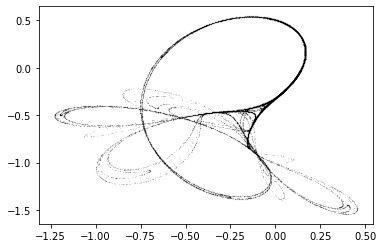

In [5]:
sol =Tinkerbell().make_trajectory(20000)

plt.plot(sol[0, :, 0], sol[0, :, 1], '.k', markersize=0.1)

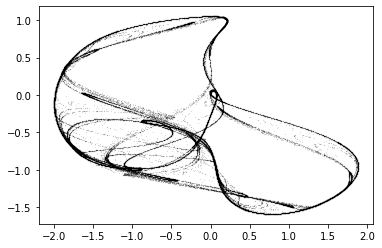

In [6]:
sol =  DeJong().make_trajectory(50000)

plt.plot(sol[0, :, 0], sol[0, :, 1], '.k', markersize=0.1)

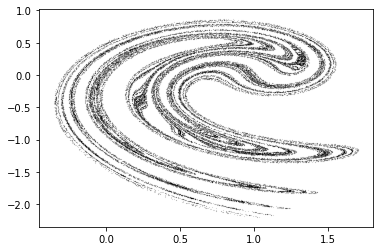

In [7]:
sol =  Ikeda().make_trajectory(50000)

plt.plot(sol[0, :, 0], sol[0, :, 1], '.k', markersize=0.1)

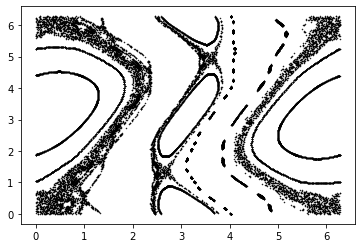

In [8]:

model = Chirikov()
model.ic =  2 * np.pi * np.random.random((10, 2)) # uniform random initial conditions
sol = model.make_trajectory(2000)
plt.figure()
plt.plot(np.mod(sol.T[0], 2*np.pi), np.mod(sol.T[1], 2*np.pi), '.k', markersize=1);

KeyboardInterrupt: 

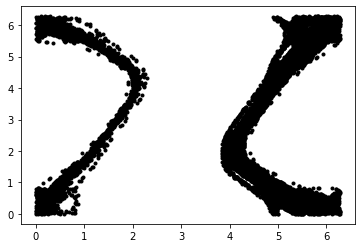

<Figure size 432x288 with 0 Axes>

In [8]:
model = Chirikov()


sol = model.make_trajectory(10000)
plt.figure()
plt.plot(np.mod(sol[0, :, 0], 2*np.pi), np.mod(sol[0, :, 1], 2*np.pi), '.k')


plt.figure()
model.ic =  2 * np.pi * np.random.random((40, 2)) # uniform random initial conditions
sol = model.make_trajectory(20000)
plt.figure(figsize=(20, 20))
plt.plot(np.mod(sol.T[0], 2*np.pi), np.mod(sol.T[1], 2*np.pi), '.k', markersize=1, alpha=0.1);

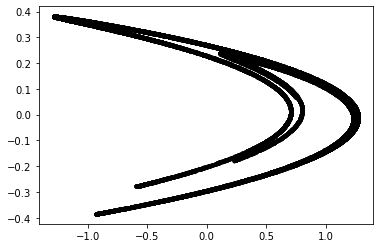

In [4]:
model = Henon()

sol = model.make_trajectory(20000)

plt.plot(sol[0, :, 0], sol[0, :, 1], '.k')

In [7]:
model.ic = np.array([[0.15, 0.766241], [0.25, 0.796241]])

sol = model.make_trajectory(20000)

[[[0.15     0.766241]]

 [[0.25     0.796241]]]


TypeError: tuple indices must be integers or slices, not tuple

In [62]:
sol[:4]

array([[ 0.15      ,  0.76624211],
       [ 0.41218245, -0.82309582],
       [ 0.74610158,  0.19406399],
       [ 0.27238371,  0.90397858]])

In [60]:
model.rhs(0.15, np.pi/4.1)

TypeError: __call__() takes 2 positional arguments but 3 were given

In [62]:
len(np.array(1).shape)

len(np.array([0, 1, 2]).shape)

len(np.array([[0.15, 0.766241], [0.15, 0.766241]]))

2

In [64]:
qq = 0

if qq < 1: qq = 1
    
print(qq)

1


In [34]:
model.t

array(1.5, dtype=float128)

In [55]:
sol = model.make_trajectory(1000, ic=np.array([[0.15, 0.766241], [0.15, 0.766241]]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

(-1.0, 1.0)

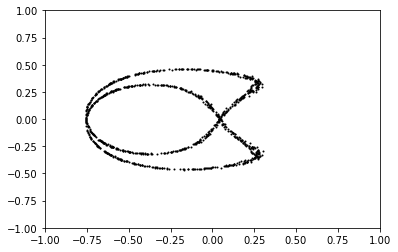

In [54]:
model = BlinkingVortex()
model.ic = np.array([0.15, 0.766241])
# model.ic = np.array([[0.15, 0.766241], [0.15, 0.766241]])
# model.t *= 0.93


# model.ic = model.ic.astype(np.longdouble)
# for param_name in model.params.keys():
#     val = getattr(model, param_name)
#     val_precise = np.array(val).astype(np.longdouble)
#     setattr(model, param_name, val_precise)
    

# from decimal import *
# getcontext().prec = 100
# for param_name in model.params.keys():
#     val = getattr(model, param_name)
#     val_precise = Decimal(str(val))
#     setattr(model, param_name, val_precise)
    
# model.ic = [0.1, np.pi/4]

sol = model.make_trajectory(1000)

# plt.plot(sol[:, 0], sol[:, 1], '.k')

xx, yy = sol[:, 0]*np.cos(sol[:, 1]), sol[:, 0]*np.sin(sol[:, 1])


# plt.plot(xx, yy, '.k', markersize=0.1)
plt.plot(xx, yy, '.k', markersize=2)

plt.xlim([-1, 1])
plt.ylim([-1, 1])
# plt.plot(xx[0], yy[0], '.r')

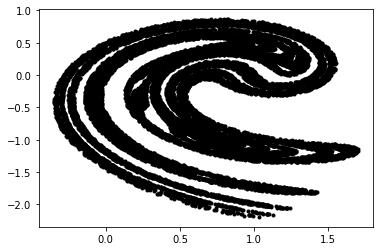

In [3]:
model = Ikeda()

sol = model.make_trajectory(20000)

plt.plot(sol[0, :, 0], sol[0, :, 1], '.k')

## xx, yy = sol[:, 0]*np.cos(sol[:, 0]), sol[:, 0]*np.sin(sol[:, 0])

plt.plot(xx, yy, '.k')

In [1]:
sol[-1]

NameError: name 'sol' is not defined

In [3]:
from math import pi

print(pi)

3.141592653589793


In [4]:
pi = Decimal("3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117067982148086513282306647093844609550582231725359408128481117450284102701938521105559644622948954930381964428810975665933446128475648233")

pi

NameError: name 'Decimal' is not defined